### This jupyter notebook is for examination parameters in Convolution Neural Network


### Basic Neural Net
- Input is an array of size `n` $a=[a_0, ..., a_{n-1}]$
- Then multiple _Hidden Layers_. It could be hundreds of hidden layers. Each _node_ in a _hidden layer_ will have a set of parameters $w$ that maps to the previous layer nodes. For exapmle, each node $i$ in the first _hidden layer_ will have set of parameters $w_i = [w_{i,0}, ..., w_{i,n-1}]$
- Output at node $i$ is $o_i = w_i\times a$. Also, there will be a _bias_ $b_i$.
    
  $o_i = w_{i,0} \times a_0 + w_{i,1}\times a_1 + ... + w_{i,n-1} \times a_{n-1} + b_i$
  
  So we have $n+1$ parameters for node $i$
- Total we will have $k\times (l+1)$ parameters for each _hidden layer_, where $k$ is the number of nodes in the current hidden layer, and $l$ is the number of nodes in the previous layer.
- Usually after each output, there is an _activation function_. It is used to refine the output. 
- Learning is a process of adjusting the values of all parameter $w$ and bias $b$ in the network by using __Back Propagation__ (LeCun).

### Convolution Neural Net (CNN)
CNN uses the concept of neural net, where the input is an image, and hidden layers are convolution layers.

- For simplicity, we first look at an input image with single channel/black-white image, then move to multiple-channel image later.
- Conv layer:
    - A _kernel_ is a 2D mat
    - Convolution is _dot product_ of the _kernel_ to a _moving window_ of image.
    - Example: we have input image $A$ and kernel $K$ of size $2\times2$
        - First pixel of output image $ o_{1,1} = A_{1,1} * K_{1,1}+A_{1,2} * K_{1,2}+A_{2,1} * K_{2,1}+A_{2,2} * K_{2,2}$
        - Second pixel of output image $ o_{1,2} = A_{1,2} * K_{1,1}+A_{1,3} * K_{1,2}+A_{2,2} * K_{2,1}+A_{2,3} * K_{2,2}$
- CNN is a network that feeds an input image through multiple convolution layers to capture features of image.
    - But, since each value of pixel in image is sensitive to the condition when the image is captured (sunny , cloudy, indoor, outdoor, etc...), kernels with fixed values are not sufficient to capture the features of different images. So we want to adjust the values of kernels by adding weights $w_K$ to each element of kernel $K$. The output image of a convolution now becomes:
        - $o_{1,1} = w_{K,1}A_{1,1} K_{1,1} + w_{K,2}A_{1,2}K_{1,2} + w_{K,3}A_{2,1}K_{2,1} + w_{K,4}A_{2,2}K_{2,2}+w_{K,0}$
        - $o_{1,2} = w_{K,1}A_{1,2}K_{1,1} + w_{K,2}A_{1,3}K_{1,2} + w_{K,3}A_{2,2}K_{2,1} + w_{K,4}A_{2,3}K_{2,2}+w_{K,0}$
    - Total number of parameters for each kernel is $|w|= |kernel| + 1$. The addition one is for the bias $w_{K,0}$.
    - For multiple-channel image, we cannot use a same set of $w$ for all channels in the image. For example in rgb image, r channel can capture different feature than blue channel. So we will need a different set of $w$ for each channel.
    - Size of $w$ for multiple-channel image is $|w| = |kernel| \times n_{channel} + 1$
    - Each convolution layer will use different number of kernels. So the total parameters for each convolution layer is
        $|w| = (|kernel| \times n_{channel} + 1) \times n_{kernel}$

- Learning in CNN is the process of adjusting $w$ for each kernels so it can get desired output values.

Let look at an example in tensorFlow.

In [ ]:
import tensorflow as tf
print('tensorFlow version',tf.__version__)

from tensorflow.keras import layers, activations

image_channel = 3   # rgb channels
image_size = (20,20)
img_shape = (*image_size, image_channel)
model = tf.keras.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=(5,5),activation=activations.relu, input_shape=img_shape))
model.add(layers.Conv2D(filters=64,kernel_size=(5,5),activation=activations.relu, input_shape=img_shape))
model.summary()

tensorFlow version 2.2.0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        51264     
Total params: 53,696
Trainable params: 53,696
Non-trainable params: 0
_________________________________________________________________


For first layer of cnn:
$|w| = (5\times 5\times 3 + 1)\times 32 = 2432$

Second layer: $|w| = (5\times 5 \times 32 + 1) \times 64 = 51264$

A CNN using handwritten dataset from _Keras_.

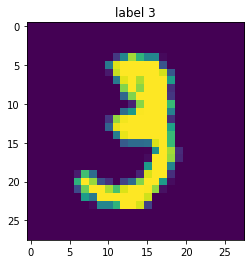

image size (28, 28, 1)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

(train_imgs, train_labels),(test_imgs, test_labels) = tf.keras.datasets.mnist.load_data()

# reshape 2d b/w img to 3d : (r,c) -> (r,c,1)
if len(train_imgs.shape) == 3:
    train_imgs = np.expand_dims(train_imgs, axis=3)
    test_imgs = np.expand_dims(test_imgs, axis=3)

sample_index = 10
img = train_imgs[sample_index, :, :, 0]
plt.imshow(img)
plt.title('label {}'.format(train_labels[sample_index]))
plt.show()
img_shape = train_imgs.shape[1:]
print('image size', img_shape)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)              

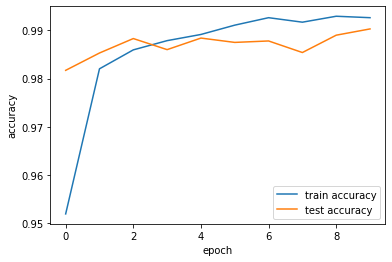

In [ ]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3),activation=activations.relu, input_shape=img_shape),
    layers.MaxPool2D(),
    layers.Conv2D(64, (3,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(100, activation=activations.relu),
    # layers.Dense(100, activation=activations.relu),
    layers.Dense(10, activation=activations.softmax)
     ])

model.summary()

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics='accuracy')
history = model.fit(train_imgs, train_labels, epochs=10, validation_data=(test_imgs, test_labels))

plt.plot(history.history['accuracy'][-20:], label='train accuracy')
plt.plot(history.history['val_accuracy'][-20:], label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()


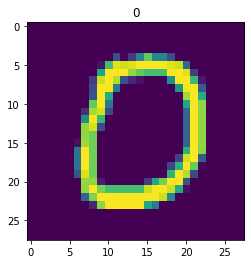

[1.0000000e+00 8.2193381e-18 1.8811322e-12 4.5548367e-15 7.0409916e-13
 1.5674511e-09 7.9921694e-12 8.4171000e-13 5.3410939e-11 1.3934517e-10]
0


In [ ]:
index = 10
img = test_imgs[index]
plt.imshow(img[:,:,0])
plt.title(test_labels[index])
plt.show()
# print(img.shape)
# img = img.reshape(1,*img.shape)
# print(img.shape)
# pred = model.predict([img])
# print('pred', pred.argmax())
pred_all = model.predict(test_imgs)



In [ ]:
pp = pred_all.argmax(axis=1)
print(pred_all[index])
print(pp[index])
eq = pp == test_labels
print(len(test_labels))
print(sum(eq)/len(test_labels))

[1.0000000e+00 8.2193381e-18 1.8811322e-12 4.5548367e-15 7.0409916e-13
 1.5674511e-09 7.9921694e-12 8.4171000e-13 5.3410939e-11 1.3934517e-10]
0
10000
0.9903


247
[2.8885296e-07 3.5742135e-03 3.7032782e-04 2.9349867e-12 6.8554416e-04
 4.0319543e-09 9.9535608e-01 3.4866481e-11 1.3538124e-05 2.6137917e-10]


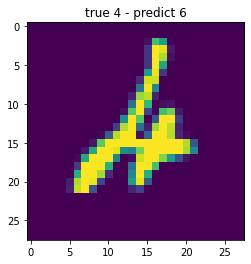

In [ ]:
neq = pp!=test_labels
indexes = np.argwhere(neq==1)
i = indexes[0][0]
print(i)
img = test_imgs[i,:,:,0]
plt.imshow(img)
plt.title('true {} - predict {}'.format(test_labels[i], pp[i]))
print(pred_all[i])
plt.show()

# sample_index = 10
# img = train_imgs[sample_index, :, :, 0]
# plt.imshow(img)
# plt.title('label {}'.format(train_labels[sample_index]))
# plt.show()